In [69]:
import pandas as pd

df = pd.read_csv("DataSets/weatherAUS.csv")
print(df)
df.info()

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

## Selecting features
Keep only features which might affect the chance of rain tomorrow.

According to the [NOAA](https://www.noaa.gov/education/resource-collections/weather-atmosphere/weather-observations) the main factors affecting precipitation are temperature, humidity, precipitation, air pressure, wind speed, and wind direction. Excluding precipitation, we select thes values at 3pm as they are as they are the most likely to affect the weather the next day based on their temporal proximity. 

In [70]:
df_copy = df[["Pressure3pm", "Temp3pm", "WindSpeed3pm", "Humidity3pm", "WindDir3pm", "RainTomorrow"]]
df_copy = df_copy.dropna(axis='index', how='any', inplace = False)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125083 entries, 0 to 145458
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Pressure3pm   125083 non-null  float64
 1   Temp3pm       125083 non-null  float64
 2   WindSpeed3pm  125083 non-null  float64
 3   Humidity3pm   125083 non-null  float64
 4   WindDir3pm    125083 non-null  object 
 5   RainTomorrow  125083 non-null  object 
dtypes: float64(4), object(2)
memory usage: 6.7+ MB


## Remapping wind direction
Wind direction is converted from distinct string values to distinct numeric values to be used for model training.

In [71]:
dir_map = dict.fromkeys(df_copy.WindDir3pm)

ucounter = 0
for x in dir_map:
    dir_map[x] = ucounter
    ucounter = ucounter + 1

print(dir_map)

df_copy["WindDir3pm"] = df_copy["WindDir3pm"].map(dir_map)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


## Remapping rain tomorrow
Rain tomorrow is converted from distinct string values to distinct numeric values to be used for model training.

In [72]:
tomr_map = dict.fromkeys(df_copy.RainTomorrow)

ucounter = 0
for x in tomr_map:
    tomr_map[x] = ucounter
    ucounter = ucounter + 1

print(tomr_map)

df_copy["RainTomorrow"] = df_copy["RainTomorrow"].map(tomr_map)

{'No': 0, 'Yes': 1}


In [73]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125083 entries, 0 to 145458
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Pressure3pm   125083 non-null  float64
 1   Temp3pm       125083 non-null  float64
 2   WindSpeed3pm  125083 non-null  float64
 3   Humidity3pm   125083 non-null  float64
 4   WindDir3pm    125083 non-null  int64  
 5   RainTomorrow  125083 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 6.7 MB


## Data Visualization
We visualize the distribution of the data in the dataframe

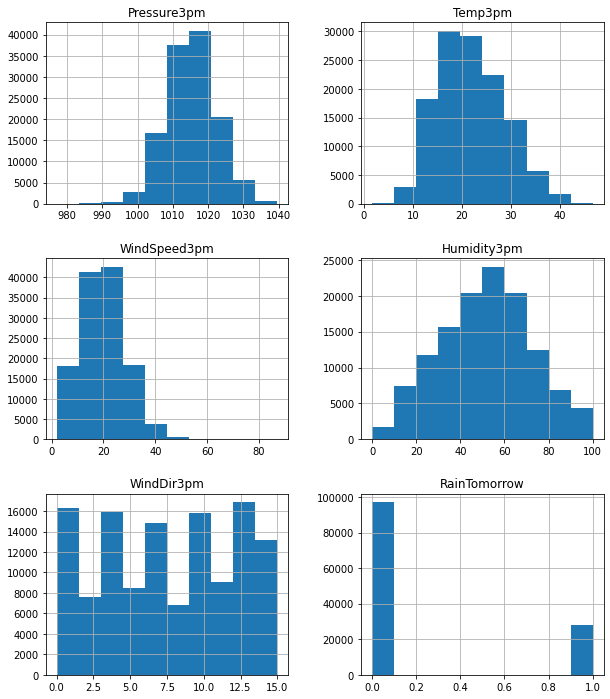

In [74]:
import matplotlib.pyplot as plt

df_copy.hist(figsize=(10,12))
plt.show()

## Shrinking our data
The resulting dataframe after processing is too large for this projects requirement (needs to be less than 1 mb to be posted on github). In order to solve this we use a randomo shuffled indices to select at random which row we will use in a reduced dataframe.

In [75]:
import numpy as np

data_count = 18000 # calculated size to be under 1 megabyte

np.random.seed(540)
shuffled_indices = np.random.permutation(data_count)

reduced_df = df_copy.iloc[shuffled_indices]

reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 4351 to 3815
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pressure3pm   18000 non-null  float64
 1   Temp3pm       18000 non-null  float64
 2   WindSpeed3pm  18000 non-null  float64
 3   Humidity3pm   18000 non-null  float64
 4   WindDir3pm    18000 non-null  int64  
 5   RainTomorrow  18000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 984.4 KB


## Save out recuded dataframe
Save the reduced dataframe for exploration.

In [76]:
reduced_df.to_csv("DataSets/weatherAUSProcessed.csv", index=False)